### Prática 1: Geração de Canal Plano Rayleigh

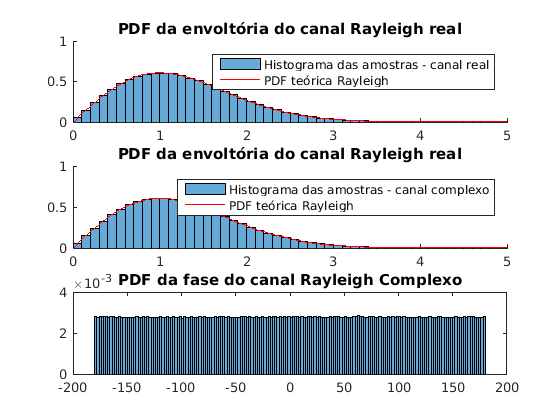

In [3]:
clear all; close all; clc;

% Parâmetros
N = 2000;                                  % Número de amostras
ts = 0.1;
x=[0:ts:5];                                % Eixo x
sigma = 1;                                  % Parâmetro Rayleigh
u = rand(N);                      % Amostras aleatórias uniformemente distribuídas de 0 a 1

% Canal Rayleigh real via método da inversão
rReal = sigma.*sqrt(-2*log(u));        % Rayleigh via método da inversão

% PDF Rayleigh teórico 
pdfTeo = x./(sigma^2).*exp(-(x./sigma).^2/2); 

% Canal Rayleigh complexo via VAs Gaussianas independentes
rComplexo = randn(N)+1j.*randn(N);

%% Gráficos
figure(1)
subplot(3,1,1)
hold on
% Histograma do Canal real vs PDF teórica
histogram(rReal,x, 'Normalization','pdf');

% PDF teórica
plot(x,pdfTeo,'r')
hold off
title('PDF da envoltória do canal Rayleigh real');
legend('Histograma das amostras - canal real','PDF teórica Rayleigh');

% Envoltória do Canal complexo
subplot(3,1,2)
hold on
% Histograma do Canal complexo vs PDF teórica
histogram(abs(rComplexo),x, 'Normalization','pdf');

% PDF teórica
plot(x,pdfTeo,'r')
hold off
title('PDF da envoltória do canal Rayleigh real');
legend('Histograma das amostras - canal complexo','PDF teórica Rayleigh');


% Histrograma da Fase do Canal complexo
subplot(3,1,3)
histogram(angle(rComplexo)*180/pi, 'Normalization', 'pdf')
title('PDF da fase do canal Rayleigh Complexo')


### Prática 2: Geração de canal plabo com desvanecimento Rice

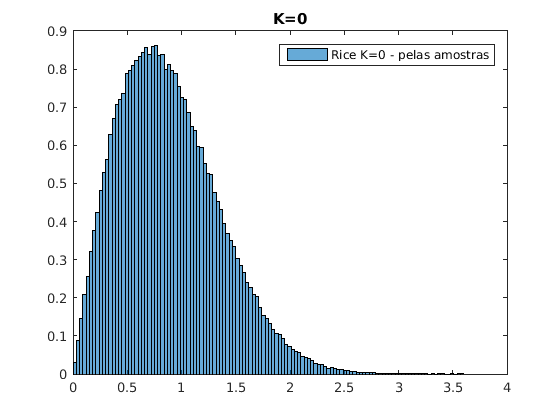

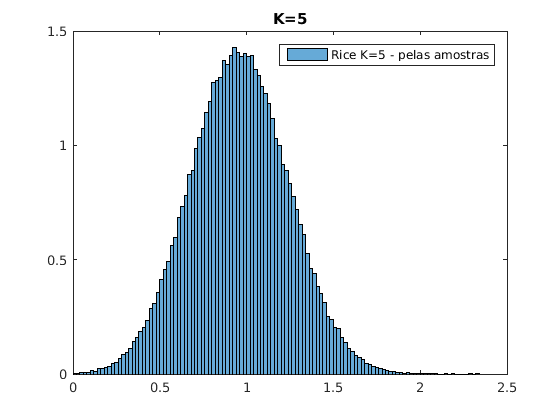

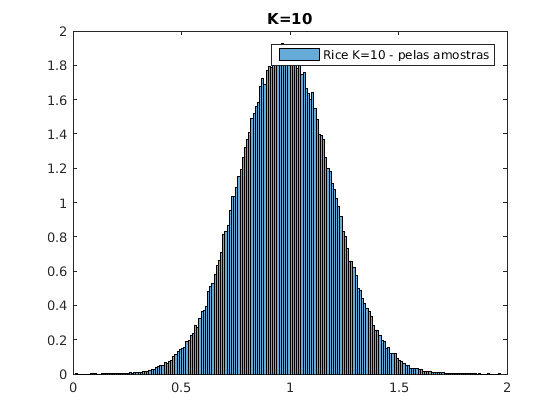

In [4]:
clear all; close all; clc;

% Parâmetros
N = 500;                                        % Número de amostras a gerar
vtK = [10,5,0];                                 % Fatores K Ricianos a simular
totPower=1;                                     % Total power of LOS path & scattered paths

% Loop nos valores de K
for ik = 1:length(vtK)
    K = vtK(ik);
    s=sqrt(K/(K+1)*totPower);                    % Parâmetro de não centralidade
    sigma=totPower/sqrt(2*(K+1));
    % Amostras do Canal Rice
    X = s + sigma*randn(N);                % LOS: VA Gaussina com média=s e sigma definido
    Y = 0 + sigma*randn(N);                % NLOS: VA Gaussina com média=0 e sigma definido
    Z = X + 1j*Y;
    
    %subplot?
    figure(ik)
    histogram(abs(Z),'Normalization', 'pdf')        % Histograma de Z
    
    % PDF teórica Rayleigh (para comparação)    
%     if K == 0
%         rayleigh_pdf = r/(sigma^2)*np.exp(-r^2/(2*sigma^2));
%         plot(r,rayleigh_pdf,'g*');
%         hold on
%     end
%     %TODO: PDF Rice teórica
%     fRice = 2.*r.*(K+1)/totPower.*exp(-r.^2.*(K+1)/totPower-K).*besseli(0,2.*r.*sqrt(K*(K+1)/totPower));
    
    % Gráficos
    %plot(r,fRice,'r')
    %hold off
    title(['K=' num2str(vtK(ik))])
    legend(['Rice K=' num2str(vtK(ik)) ' - pelas amostras'])
end

### Prática 3: Desempenho de modulação digital sujeito a Desvanecimento Rayleigh

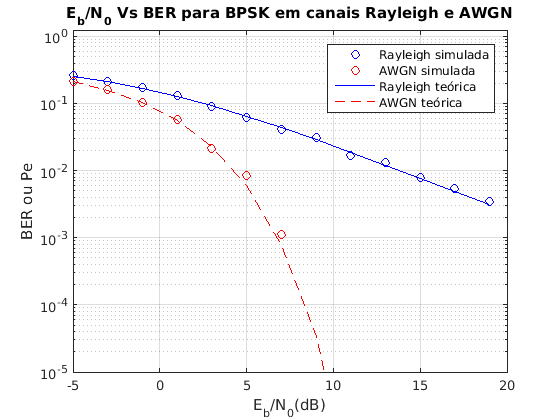

In [5]:
clear all; close all; clc;

% Parâmetros
N = 1e4;              % Número de símbolos BPSK a serem transmitidos
EbN0dB = -5:2:20;     % Valores EbN0 a simular
% Transmissor
d = rand(1,N) > 0.5;     % Dados binários 
x = 2*d -1;                      % Símbolos BPSK: 0 representado por -1 e 1 representado por 1

% Inicialização de vetores de BER simulada e teórica
%BER_rayleigh_simulada = zeros(length(EbN0dB));
%BER_awgn_simulada = zeros(length(EbN0dB));

% Loop de EbNo
for i = 1:length(EbN0dB)
    % Canal
    % Ruído AWGN complexo com média 0 e variância 1 (vetor base)
    noise = 1/sqrt(2)*(randn(1,N)+1j*randn(1,N));
    % Vetor de ruído com potência proporcional a EbNo corrente
    n = noise.*10^(-EbN0dB(i)/20);  
    % Desvanecimento Rayleigh normalizado
    h = 1/sqrt(2)*(randn(1,N)+1j*randn(1,N));
    
    % Sinal recebido para caso com somente ruído AWGN
    y_awgn = x + n; 
    % Sinal recebido para caso com desvanecimento Rayleigh e ruído AWGN
    y_rayleigh = h.*x + n;
    
    % Receptor coerente para o canal Rayleigh (supondo conhecimento de h no receptor)
    y_rayleigh_cap=y_rayleigh./h; % Equalizador
    % Os símbolos positivos recebidos são 1, os demais são 0 (lembrar da simbologia)
    r_rayleigh = real(y_rayleigh_cap)>0;

    % Receptor para o canal somente AWGN
    r_awgn = real(y_awgn) > 0; 
    % Contador de erro para o caso com Rayleigh e AWGN
    BER_rayleigh_simulada(i) = sum(xor(d,r_rayleigh));
    % Contador de erro para o caso com somente AWGN
    BER_awgn_simulada(i) = sum(xor(d,r_awgn));
end

% Cálculo da BER para o caso com Rayleigh e AWGN
BER_rayleigh_simulada = BER_rayleigh_simulada/ N;
% Cálculo da BER para o caso com somente AWGN
BER_awgn_simulada = BER_awgn_simulada/N;

% Pe Teórica
EbN0=10.^(EbN0dB./10);            % Eb/N0 em escala linear
% Implementação direta da equação de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 0.5.*(1-sqrt(EbN0./(1+EbN0)));
% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5*erfc(sqrt(EbN0));

% Gráficos
figure(1)
% Rayleigh simulado
semilogy(EbN0dB,BER_rayleigh_simulada,'bo')
hold on
% AWGN simulado
semilogy(EbN0dB,BER_awgn_simulada,'ro')
% Rayleigh teórico
semilogy(EbN0dB,BER_rayleigh_teorica,'b-')
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'r--')
hold off

grid()
axis([-5,20,10^(-5),1.2])
legend('Rayleigh simulada','AWGN simulada','Rayleigh teórica','AWGN teórica')
title('E_b/N_0 Vs BER para BPSK em canais Rayleigh e AWGN')
xlabel('E_b/N_0(dB)')
ylabel('BER ou Pe')

### Prática 4: Desempenho de modulação digital sujeito a Desvanecimento Rice

Simulando K = 0
Simulando K = 5
Simulando K = 30


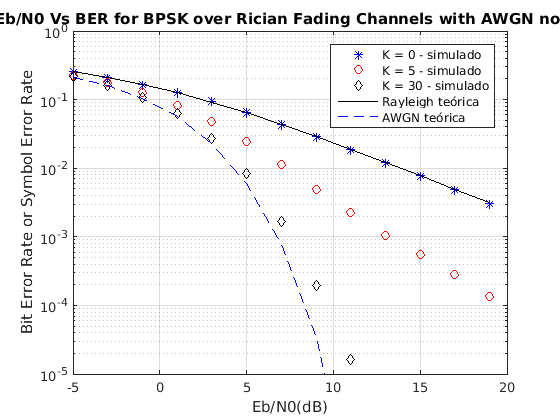

In [1]:
clear all; close all; clc;

% Parâmetros
N = 10^6;                          % Número de símbolos BPSK a serem transmitidos
EbN0dB = -5:2:20;                  % Valores EbN0 a simular
EbN0=10.^(EbN0dB/10);             % EbN0 em escala linear
totPower=1;                        % Potência total (LOS + NLOS)
K=[0, 5, 30];                        % Valores K Ricianos a simular
% Transmissor
d=rand(1,N)>0.5;             % Dados binários 
x = 2*d -1;                  % Símbolos BPSK: 0 representado por -1 e 1 representado por 1

% Configuração da figuras e linhas
plotStyleSim=['*','o','d'];
color=['b', 'r', 'k'];

% Loop de K Riciano
for index = 1:length(K)
    k = K(index);                   % Valor de K corrente
    % Mensagem de progresso da simulação
    disp(['Simulando K = ',num2str(k)])
    % Canal
    % Parâmetro de não-centralidade e sigma de Rice
    s = sqrt( k/(k+1)*totPower );
    sigma = totPower/sqrt(2*(k+1));
    
    % Loop de EbNo
    for i = 1:length(EbN0dB)
        % Continuação do Canal 
        % Ruído AWGN complexo com média 0 e variância 1 (vetor base)
        noise = 1/sqrt(2)*(randn(1,N)+1j.*randn(1,N));
        % Vetor de ruído com potência proporcional a EbNo corrente    
        n = noise.*10^(-EbN0dB(i)/20);
        % Desvanecimento Rice
        h = ((sigma*randn(1,N)+s)+1j.*(randn(1,N)*sigma+0));
        
        % Receptor
        % Sinal recebido do canal Rice e AWGN
        y_ricean=h.*x+n; 
        % Receptor coerente: equalização + decisão
        y_ricean_cap=y_ricean./h; 
        r_ricean=real(y_ricean_cap)>0;
        % Contador de erro
        simBER_ricean(i)=sum(xor(d,r_ricean));
    end
    % Cálculo da BER para o valor de K corrente
    simBER_ricean=simBER_ricean/N;

    % Gráficos
    mark=[color(index),plotStyleSim(index)];
    semilogy(EbN0dB,simBER_ricean,mark)
    hold on
end

% Pes Teóricas
% Implementação direta da equação de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 0.5*(1-sqrt(EbN0./(1+EbN0)));
% Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = 0.5*erfc(sqrt(EbN0));

% Graficos
% Rayleigh teórico
hold on
semilogy(EbN0dB,BER_rayleigh_teorica,'k-')
% AWGN teórico
semilogy(EbN0dB,BER_awgn_teorica,'b--')
legend('K = 0 - simulado','K = 5 - simulado','K = 30 - simulado','Rayleigh teórica','AWGN teórica')
title('Eb/N0 Vs BER for BPSK over Rician Fading Channels with AWGN noise')
xlabel('Eb/N0(dB)')
ylabel('Bit Error Rate or Symbol Error Rate')
axis([-5,20,10^(-5),10^0])
grid on